In [11]:
import sys
sys.path.append('..')

from gamadhani.src.dataset import Task
from functools import partial
import gin
import numpy as np
from matplotlib import pyplot as plt

In [2]:
config_file = '/home/mila/n/nithya.shikarpur/GaMaDHaNi-dev/configs/transformer_pitch_config.gin'
gin.parse_config_file(config_file)

/home/mila/n/nithya.shikarpur/.conda/envs/test-env/lib/python3.10/site-packages/x_transformers/x_transformers.py:445: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @autocast(enabled = False)
/home/mila/n/nithya.shikarpur/.conda/envs/test-env/lib/python3.10/site-packages/x_transformers/x_transformers.py:469: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @autocast(enabled = False)
/home/mila/n/nithya.shikarpur/.conda/envs/test-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ParsedConfigFileIncludesAndImports(filename='/home/mila/n/nithya.shikarpur/GaMaDHaNi-dev/configs/transformer_pitch_config.gin', imports=['__gin__.dynamic_registration', 'gamadhani.src', 'gamadhani.src.dataset', 'gamadhani.src.model_transformer', 'gamadhani.src.task_functions', 'gamadhani.utils.utils', 'torch.optim'], includes=[])

In [4]:
task = Task()

In [26]:
data = {
    'pitch': {
        'data': np.random.randint(0, 800, 1200).astype(np.float32),
    }
}


In [27]:
data

{'pitch': {'data': array([370., 366., 345., ..., 211.,  50., 525.], dtype=float32)}}

In [28]:
converted = task.read_(inputs=data)['decoder_inputs']
output_data = task.invert_(f0=converted)[:, 0]

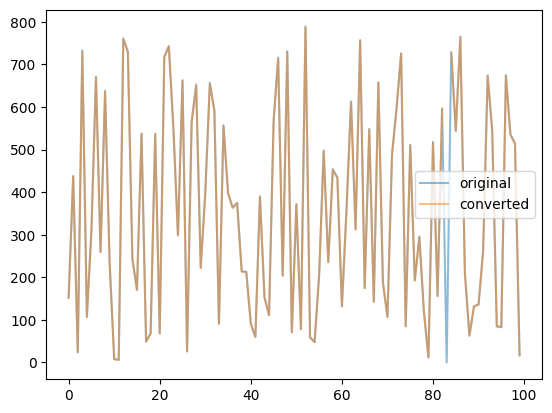

In [31]:
plt.plot(data['pitch']['data'][600:800:2], label='original', alpha=0.5)
plt.plot(output_data[300:400], label='converted', alpha=0.5)
plt.legend()

In [32]:
data['pitch']['data'][750:800:2]

array([511., 193., 296., 119.,  12., 518., 156., 596.,   0., 729., 544.,
       765., 210.,  63., 132., 136., 262., 674., 544.,  85.,  83., 675.,
       536., 515.,  17.], dtype=float32)

In [33]:
output_data[375:400]

array([509.82547 , 192.07506 , 294.51413 , 118.921   ,  11.935547,
       515.7494  , 156.01344 , 595.87244 ,        nan, 725.17883 ,
       543.27026 , 763.8752  , 209.45934 ,  62.99621 , 131.95113 ,
       135.81757 , 260.87106 , 672.7188  , 543.27026 ,  84.57698 ,
        82.64524 , 672.7188  , 533.93726 , 512.7789  ,  16.977198],
      dtype=float32)